In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | baijiantan
Processing Record 5 of Set 1 | champerico
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | mponela
Processing Record 9 of Set 1 | buala
Processing Record 10 of Set 1 | chuzhou
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | yangjiang
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | kalengwa
Processing

Processing Record 40 of Set 4 | port macquarie
Processing Record 41 of Set 4 | axim
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | harper
Processing Record 44 of Set 4 | antofagasta
Processing Record 45 of Set 4 | clyde river
Processing Record 46 of Set 4 | nenjiang
Processing Record 47 of Set 4 | tateyama
Processing Record 48 of Set 4 | pachino
Processing Record 49 of Set 4 | probistip
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | scarborough
Processing Record 2 of Set 5 | progreso
Processing Record 3 of Set 5 | bereda
Processing Record 4 of Set 5 | dingle
Processing Record 5 of Set 5 | hami
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | murindo
Processing Record 8 of Set 5 | paralimni
Processing Record 9 of Set 5 | katherine
Processing Record 10 of Set 5 | leningradskiy
Processing Record 11 of Set 5 | nantucket
Processing Record 12 of Set 5 | kilosa
Processing Record 13 of Se

Processing Record 29 of Set 8 | port elizabeth
Processing Record 30 of Set 8 | dolinsk
Processing Record 31 of Set 8 | san lawrenz
Processing Record 32 of Set 8 | oksbol
Processing Record 33 of Set 8 | juegang
Processing Record 34 of Set 8 | baykit
Processing Record 35 of Set 8 | belyy yar
Processing Record 36 of Set 8 | kamina
Processing Record 37 of Set 8 | boa vista
Processing Record 38 of Set 8 | wakkanai
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | nemuro
Processing Record 41 of Set 8 | valdivia
Processing Record 42 of Set 8 | rajampet
Processing Record 43 of Set 8 | valle de allende
Processing Record 44 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 45 of Set 8 | baturaja
Processing Record 46 of Set 8 | katy
Processing Record 47 of Set 8 | nizhniy tsasuchey
Processing Record 48 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 49 of Set 8 | gewane
Processing Record 50 of Set 8 | lagoa
Processing Record 1 of Set 9 | 

Processing Record 21 of Set 12 | botou
Processing Record 22 of Set 12 | kramat
Processing Record 23 of Set 12 | san cosme y damian
Processing Record 24 of Set 12 | haines junction
Processing Record 25 of Set 12 | coahuayana
Processing Record 26 of Set 12 | raudeberg
Processing Record 27 of Set 12 | jiangyou
Processing Record 28 of Set 12 | avera
Processing Record 29 of Set 12 | yanam
Processing Record 30 of Set 12 | umm bab
Processing Record 31 of Set 12 | abu dhabi
Processing Record 32 of Set 12 | toktogul
Processing Record 33 of Set 12 | chengde
Processing Record 34 of Set 12 | honiara
Processing Record 35 of Set 12 | sangar
Processing Record 36 of Set 12 | waipawa
Processing Record 37 of Set 12 | trinidad
Processing Record 38 of Set 12 | manoel urbano
Processing Record 39 of Set 12 | camacha
Processing Record 40 of Set 12 | petfurdo
City not found. Skipping...
Processing Record 41 of Set 12 | samarai
Processing Record 42 of Set 12 | saint-augustin
Processing Record 43 of Set 12 | gi

In [7]:
len(city_data)

590

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,61.88,66,1,5.99,ZA,2021-09-21 15:41:22
1,Longyearbyen,78.2186,15.6401,43.00,95,100,3.49,SJ,2021-09-21 15:43:10
2,Victoria,22.2855,114.1577,85.32,85,51,7.25,HK,2021-09-21 15:43:36
3,Baijiantan,45.6333,85.1833,64.27,16,100,14.67,CN,2021-09-21 15:52:03
4,Champerico,14.3000,-91.9167,95.76,76,98,3.31,GT,2021-09-21 15:52:03
5,Provideniya,64.3833,-173.3000,33.46,88,100,12.01,RU,2021-09-21 15:42:01
6,Bambous Virieux,-20.3428,57.7575,71.22,68,38,14.14,MU,2021-09-21 15:42:28
7,Mponela,-13.5319,33.7401,73.27,31,15,5.48,MW,2021-09-21 15:52:03
8,Buala,-8.1450,159.5921,79.07,84,72,5.53,SB,2021-09-21 15:42:37
9,Chuzhou,32.3219,118.2978,73.74,81,0,5.86,CN,2021-09-21 15:52:04


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-09-21 15:41:22,-33.9258,18.4232,61.88,66,1,5.99
1,Longyearbyen,SJ,2021-09-21 15:43:10,78.2186,15.6401,43.00,95,100,3.49
2,Victoria,HK,2021-09-21 15:43:36,22.2855,114.1577,85.32,85,51,7.25
3,Baijiantan,CN,2021-09-21 15:52:03,45.6333,85.1833,64.27,16,100,14.67
4,Champerico,GT,2021-09-21 15:52:03,14.3000,-91.9167,95.76,76,98,3.31


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

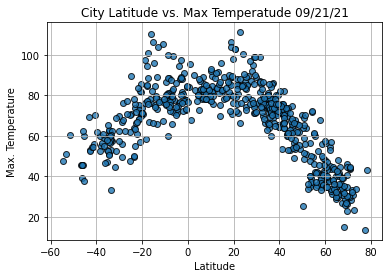

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperatude ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature')
plt.grid(True)

# Save the fig
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()


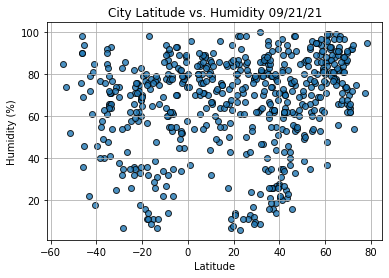

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

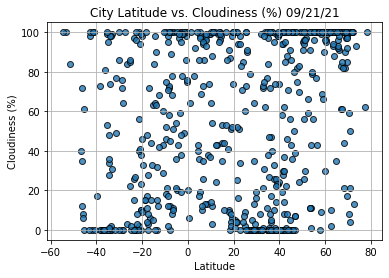

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

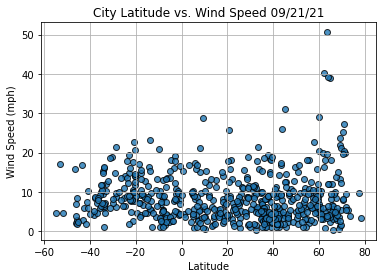

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                   Georgetown
Country                        MY
Date          2021-09-21 15:42:43
Lat                        5.4112
Lng                      100.3354
Max Temp                    80.89
Humidity                       84
Cloudiness                     98
Wind Speed                   5.64
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

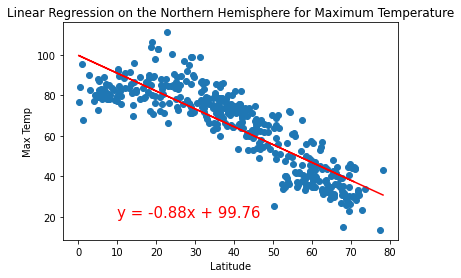

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature',\
                       'Max Temp',(10,20))

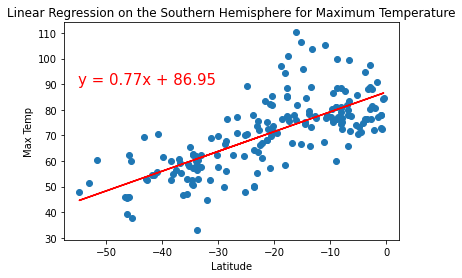

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature',\
                       'Max Temp',(-55,90))

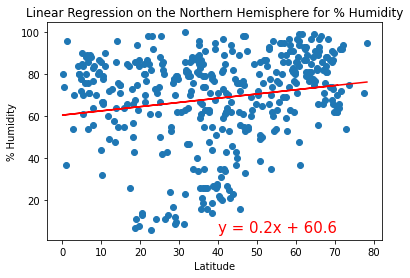

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,5))

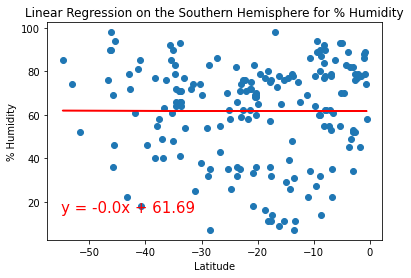

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,15))

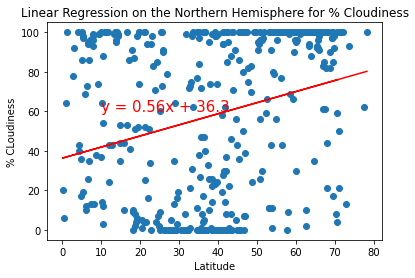

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% CLoudiness',(10, 60))

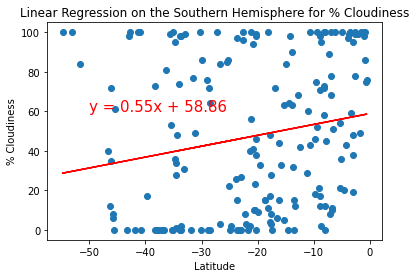

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

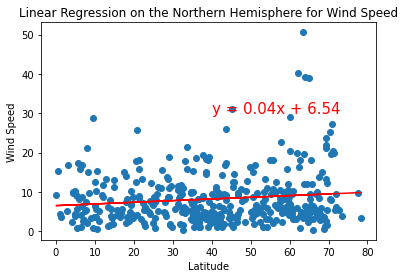

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,30))

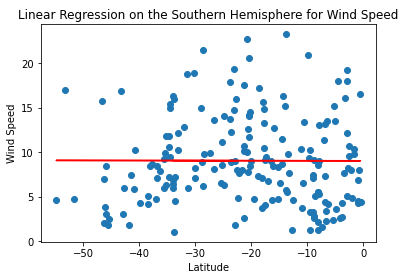

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))